<a href="https://colab.research.google.com/github/GalangNakula/UAS_Data-Science/blob/main/KampanyePemasaranBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Ganti 'path/to/your/file/' dengan lokasi file Anda jika berbeda
file_path = 'bank-additional-full.csv'
df = pd.read_csv(file_path, sep=';')

In [ ]:
# Menampilkan 5 baris pertama
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Menampilkan informasi teknis (tipe data, nilai non-null)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Menampilkan statistik deskriptif untuk fitur numerik
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


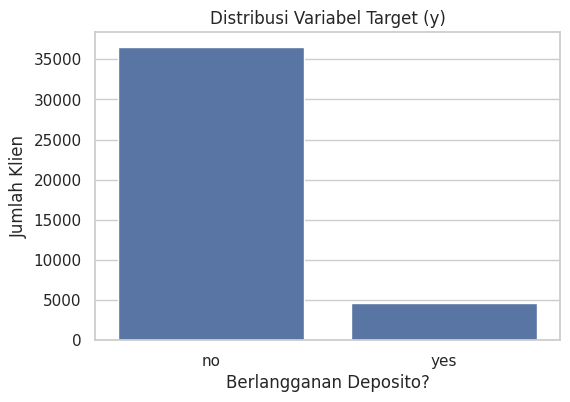

In [ ]:
# Mengatur gaya plot
sns.set(style="whitegrid")

# Visualisasi distribusi variabel target
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribusi Variabel Target (y)')
plt.ylabel('Jumlah Klien')
plt.xlabel('Berlangganan Deposito?')
plt.show()

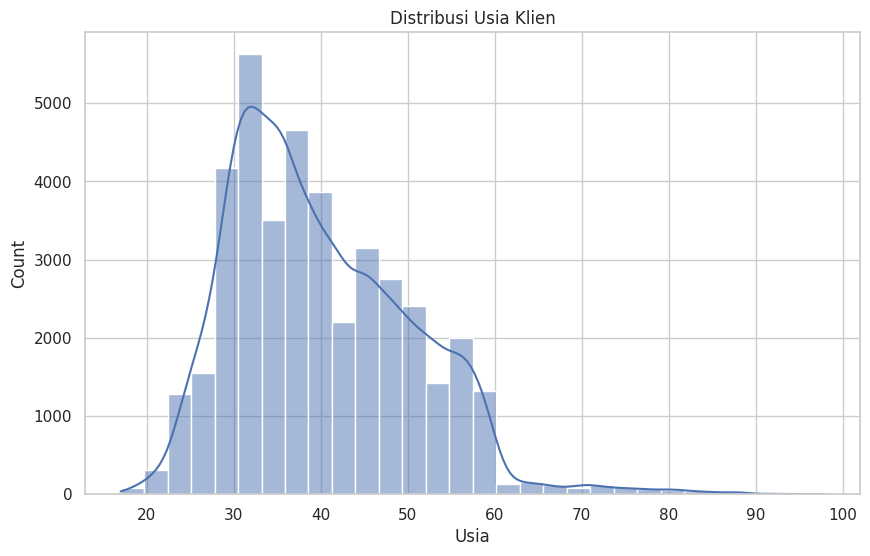

In [ ]:
# Visualisasi distribusi usia
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribusi Usia Klien')
plt.xlabel('Usia')
plt.show()

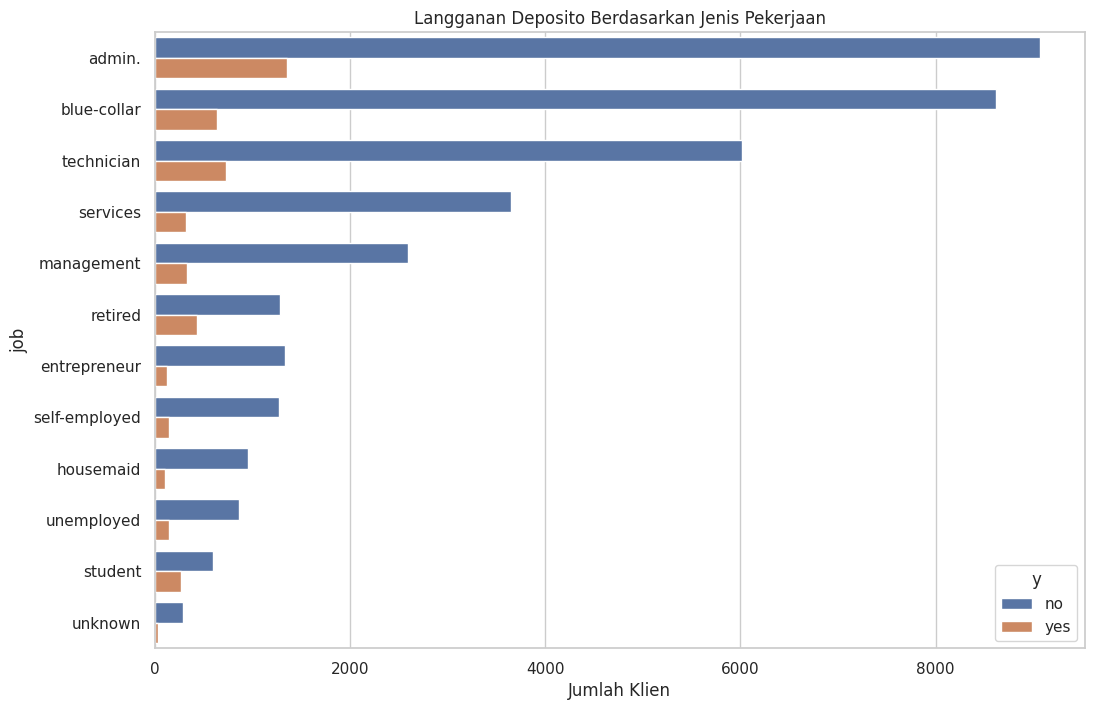

In [ ]:
# Visualisasi hubungan 'job' dengan 'y'
plt.figure(figsize=(12, 8))
sns.countplot(y='job', hue='y', data=df, order=df['job'].value_counts().index)
plt.title('Langganan Deposito Berdasarkan Jenis Pekerjaan')
plt.xlabel('Jumlah Klien')
plt.show()

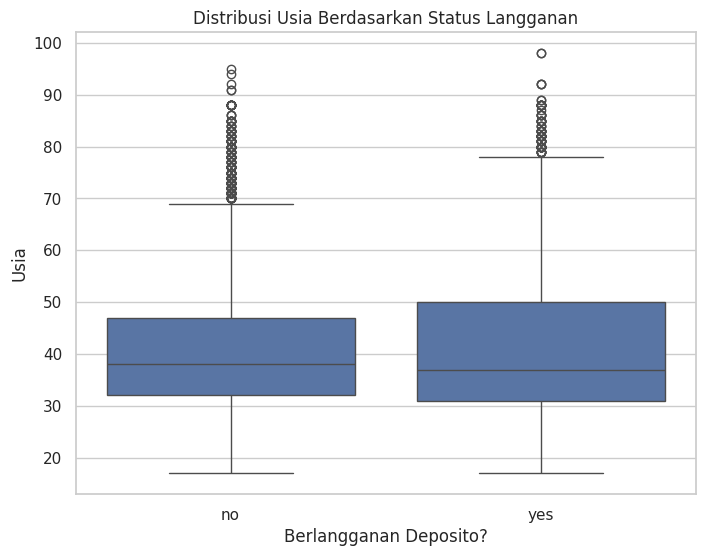

In [ ]:
# Visualisasi hubungan 'age' dengan 'y'
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='age', data=df)
plt.title('Distribusi Usia Berdasarkan Status Langganan')
plt.xlabel('Berlangganan Deposito?')
plt.ylabel('Usia')
plt.show()

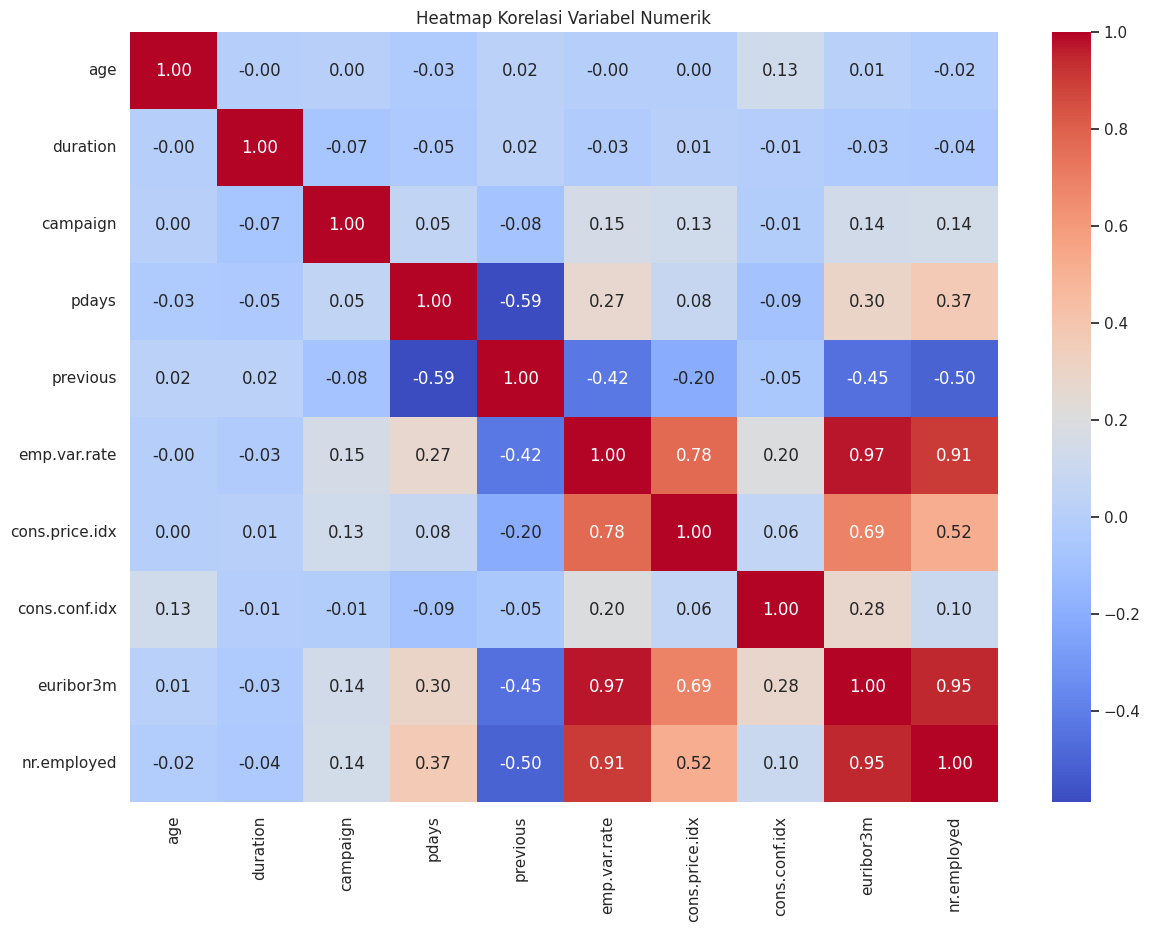

In [ ]:
# Membuat heatmap korelasi
plt.figure(figsize=(14, 10))
# Memilih hanya kolom numerik untuk korelasi
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

In [ ]:
# Salin dataframe untuk preprocessing
df_processed = df.copy()

In [ ]:
# Menghapus data duplikat
duplicate_count = df_processed.duplicated().sum()
print(f"Jumlah data duplikat ditemukan: {duplicate_count}")

if duplicate_count > 0:
    df_processed.drop_duplicates(inplace=True)
    print(f"Data duplikat telah dihapus. Shape data sekarang: {df_processed.shape}")

Jumlah data duplikat ditemukan: 12
Data duplikat telah dihapus. Shape data sekarang: (41176, 21)


In [ ]:
# Imputasi nilai 'unknown' dengan modus
# Justifikasi: Daripada kehilangan data, kita mengisinya dengan nilai yang paling mungkin.
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    mode_value = df_processed[col].mode()[0]
    df_processed[col].replace('unknown', mode_value, inplace=True)

print("Nilai 'unknown' telah berhasil diimputasi.")

Nilai 'unknown' telah berhasil diimputasi.


/tmp/ipython-input-13-2964777229.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].replace('unknown', mode_value, inplace=True)


In [ ]:
# Menghapus kolom 'duration'
# Justifikasi: 'duration' baru diketahui SETELAH panggilan selesai, jadi tidak bisa
# digunakan untuk prediksi. Ini adalah penyebab umum 'data leakage'.
df_processed.drop('duration', axis=1, inplace=True)

print("Kolom 'duration' telah dihapus.")

Kolom 'duration' telah dihapus.


In [ ]:
# 1. Mengubah variabel target 'y'
df_processed['y'] = df_processed['y'].map({'no': 0, 'yes': 1})

# 2. Mengubah fitur kategorikal lain dengan One-Hot Encoding
categorical_cols = df_processed.select_dtypes(include=['object']).columns
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print("Feature encoding selesai.")
print(f"Bentuk data setelah encoding: {df_processed.shape}")

Feature encoding selesai.
Bentuk data setelah encoding: (41176, 47)


In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = df_processed.drop('y', axis=1)
y = df_processed['y']

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data telah dibagi menjadi data latih dan data uji:")
print("Bentuk X_train:", X_train.shape)
print("Bentuk X_test:", X_test.shape)

Data telah dibagi menjadi data latih dan data uji:
Bentuk X_train: (32940, 46)
Bentuk X_test: (8236, 46)


In [ ]:
# --- Penjelasan ---
# Di sini kita menerapkan SMOTE untuk menyeimbangkan data.
# PENTING: SMOTE hanya diterapkan pada data latih (X_train, y_train)
# untuk mencegah kebocoran data.

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Distribusi kelas sebelum SMOTE:")
print(y_train.value_counts())

print("\nDistribusi kelas setelah SMOTE:")
print(y_train_smote.value_counts())

NameError: name 'X_train' is not defined

In [ ]:
# Libraries untuk Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Libraries untuk Evaluasi
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [ ]:
# Inisialisasi dan latih model Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Inisialisasi dan latih model Random Forest
# class_weight='balanced' akan memberikan bobot lebih pada kelas minoritas ('yes')
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Menghitung bobot untuk kelas positif untuk XGBoost
# Rumus: jumlah sampel negatif / jumlah sampel positif
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Inisialisasi dan latih model XGBoost
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False,
                        eval_metric='logloss', scale_pos_weight=scale_pos_weight)
xgb_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:08:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Membuat prediksi dari setiap model
y_pred_lr = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_xgb = xgb_clf.predict(X_test)

In [ ]:
# Evaluasi Logistic Regression
print("===== Laporan Klasifikasi: Logistic Regression =====")
print(classification_report(y_test, y_pred_lr))
print(f"ROC AUC Score: {roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]):.4f}\n")

# Evaluasi Random Forest
print("===== Laporan Klasifikasi: Random Forest =====")
print(classification_report(y_test, y_pred_rf))
print(f"ROC AUC Score: {roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1]):.4f}\n")

# Evaluasi XGBoost
print("===== Laporan Klasifikasi: XGBoost =====")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC AUC Score: {roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1]):.4f}\n")

===== Laporan Klasifikasi: Logistic Regression =====
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7308
           1       0.66      0.21      0.32       928

    accuracy                           0.90      8236
   macro avg       0.78      0.60      0.63      8236
weighted avg       0.88      0.90      0.87      8236

ROC AUC Score: 0.7996

===== Laporan Klasifikasi: Random Forest =====
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7308
           1       0.54      0.29      0.37       928

    accuracy                           0.89      8236
   macro avg       0.73      0.63      0.66      8236
weighted avg       0.87      0.89      0.88      8236

ROC AUC Score: 0.7778

===== Laporan Klasifikasi: XGBoost =====
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7308
           1       0.36      0.61      0.46       

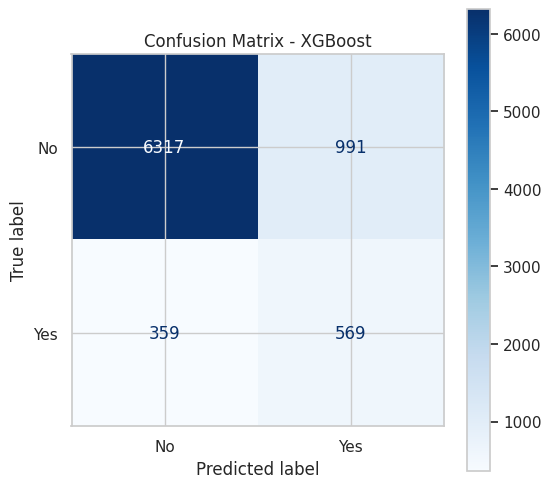

In [ ]:
# Pilih model terbaik Anda untuk divisualisasikan (contoh: XGBoost)
best_model_preds = y_pred_xgb
best_model_name = "XGBoost"

# Membuat dan menampilkan confusion matrix
cm = confusion_matrix(y_test, best_model_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

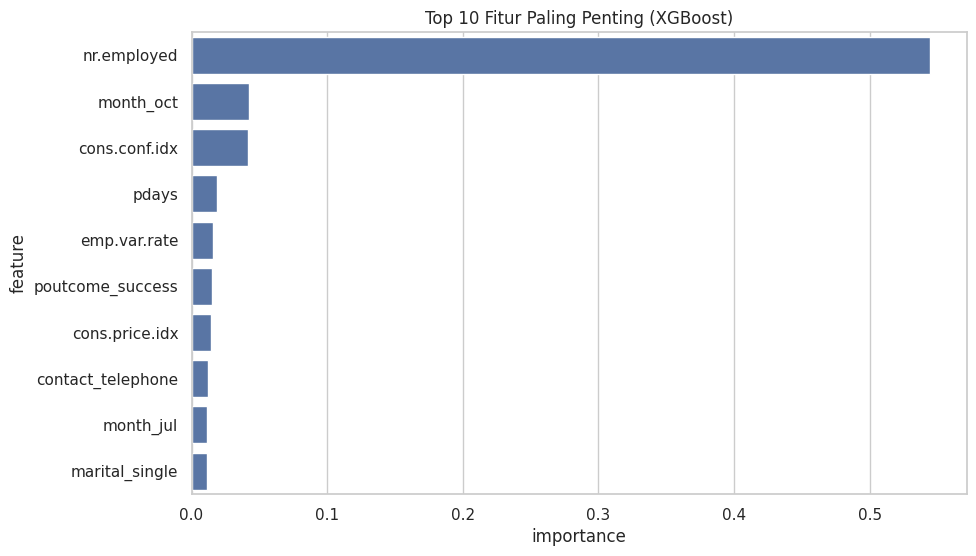

In [ ]:
# Mengambil feature importance dari model terbaik (contoh: XGBoost)
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_clf.feature_importances_
}).sort_values('importance', ascending=False).head(10)

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Top 10 Fitur Paling Penting (XGBoost)')
plt.show()